### Exploration  of Bayesian Update using Coin Flip Example

In [284]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [285]:
# Hypothesis space: possible biases on the coin
biases = np.linspace(0,1,100)
# Actual bias on coin. .5 is fair.   .8 is 80% heads, etc.
true_bias = 0.5

In [286]:
# Uncomment one of these lines to select a prior

# prior = 2 - stats.norm.pdf(biases,true_bias,.2) # "Upside down" gaussian
# prior = stats.norm.pdf(biases,.5,.2) # Gaussian
prior = stats.uniform.pdf(biases) # Uniform

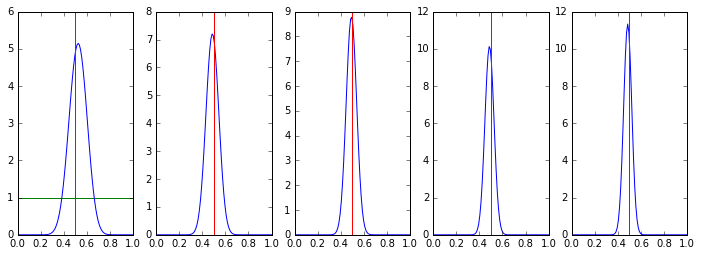

In [287]:
num_iterations = 5 # Iterations of Bayesian update
n_flips = 40 # Number of coin flips at each iteration

fig = plt.gcf()
fig.set_size_inches(12,4)

# Do num_iterations of Bayesian update
for i in range(num_iterations):
    
    # Flip the coin n_flips times.
    flips = stats.bernoulli.rvs(true_bias, size=n_flips)
    num_heads = flips.sum()
    
    # Compute the likelihood
    likelihood = stats.binom.pmf(num_heads, n_flips, biases)
    
    # Bayes!
    posterior = (prior*likelihood)/np.trapz(prior*likelihood,biases)
    
    # Plot
    plt.subplot(1, num_iterations, i+1)
    if i == 0:
        plt.plot(biases,prior,'g')
    plt.plot(biases,posterior)
    ymin,ymax = plt.ylim()
    plt.plot(np.multiply(true_bias,[1,1]),[ymin,ymax],'r')

    # Set the prior for the next iteration to be the curent posterior
    prior = posterior 
